In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [3]:
df=pd.read_excel('EastWestAirlines.xlsx',sheet_name='data')
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [4]:
array=df.values
array

array([[    1, 28143,     0, ...,     0,  7000,     0],
       [    2, 19244,     0, ...,     0,  6968,     0],
       [    3, 41354,     0, ...,     0,  7034,     0],
       ...,
       [ 4019, 73597,     0, ...,     0,  1402,     1],
       [ 4020, 54899,     0, ...,     1,  1401,     0],
       [ 4021,  3016,     0, ...,     0,  1398,     0]], dtype=int64)

In [5]:
scaler=StandardScaler()
scaled_df=scaler.fit_transform(array)

In [6]:
from sklearn.neighbors import NearestNeighbors

In [7]:
neighbors=NearestNeighbors(n_neighbors=8)
nbrs=neighbors.fit(scaled_df)

In [8]:
distances,indices=nbrs.kneighbors(scaled_df)
distances=np.sort(distances,axis=0)

In [9]:
distances=distances[:,1]

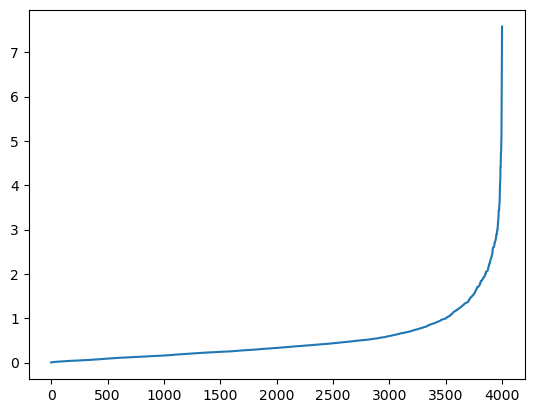

In [10]:
plt.plot(distances)

In [11]:
dbscan=DBSCAN(eps=1,min_samples=12)

In [12]:
dbscan.fit(scaled_df)

DBSCAN(eps=1, min_samples=12)

In [13]:
dbscan.labels_

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [14]:
cl=pd.DataFrame(dbscan.labels_,columns=['cluster'])

In [15]:
cl

,cluster
0,0
1,0
2,0
3,0
4,-1
...,...
3994,1
3995,1
3996,1
3997,0


In [16]:
df['cluster']=dbscan.labels_

In [17]:
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


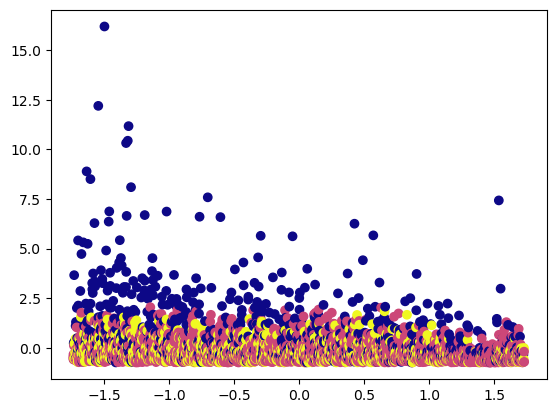

In [19]:

plt.scatter(scaled_df[:,0],scaled_df[:,1],c=dbscan.labels_,cmap='plasma')

In [20]:
print(df['cluster'].value_counts())

 0    2242
 1     977
-1     780
Name: cluster, dtype: int64


In [21]:
from sklearn.metrics import silhouette_score

In [23]:
silhouette_score(scaled_df,dbscan.labels_)

0.17336288744361694